# Iksan

In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import combineArray, multiArraySort, data_loader_from_csv, data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Iksan - Spring: 3D Analysis (Distance, Frequency - Pathloss)

In [ ]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sp_400.csv', np.log10(400), 'dist' ,100)
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sp_1399.csv', np.log10(1399),'dist', 100)
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sp_2249.csv', np.log10(2249),'dist', 100)

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

X_train_m_400

In [ ]:
%autoreload
dataX_m = list()
dataY_m = list()
dataX_m.append(X_train_m_400)
dataY_m.append(y_train_m_400)
dataX_m.append(X_train_m_1399)
dataY_m.append(y_train_m_1399)
dataX_m.append(X_train_m_2249)
dataY_m.append(y_train_m_2249)

# Summer: Distance - Pathloss

In [ ]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sm_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sm_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sm_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

# Winter: Distance-Pathloss

In [2]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_wt_400.csv', np.log10(400), 'dist' ,3)
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_wt_1399.csv', np.log10(1399),'dist', 3)
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_wt_2249.csv', np.log10(2249),'dist', 3)

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

dataX_m = list()
dataY_m = list()
dataX_m.append(X_train_m_400)
dataY_m.append(y_train_m_400)
dataX_m.append(X_train_m_1399)
dataY_m.append(y_train_m_1399)
dataX_m.append(X_train_m_2249)
dataY_m.append(y_train_m_2249)

X_train_m_400

original: 109210
filtered: 13240
Covariance Matrix
           dist      ploss   height
dist    0.66829    6.46991  0.01753
ploss   6.46991  199.79524  0.18395
height  0.01753    0.18395  0.02862
--------------------------------------------------
Preprocessing <data/PLdata_iksan_wt_400.csv>...Total 13240
- moving type: total: 9669 (training: 7735/validation: 1934)
- stationary type: total: 3571 (training: 2856/validation: 715)
original: 109060
filtered: 13178
Covariance Matrix
           dist      ploss   height
dist    0.66230    7.64274  0.01745
ploss   7.64274  281.14171  0.25075
height  0.01745    0.25075  0.02875
--------------------------------------------------
Preprocessing <data/PLdata_iksan_wt_1399.csv>...Total 13178
- moving type: total: 9607 (training: 7685/validation: 1922)
- stationary type: total: 3571 (training: 2856/validation: 715)
original: 108873
filtered: 13109
Covariance Matrix
           dist      ploss   height
dist    0.65516    7.31038  0.01735
ploss   7.31038 

array([[2.24150665, 2.60205999],
       [2.24225171, 2.60205999],
       [2.24232335, 2.60205999],
       ...,
       [3.47686944, 2.60205999],
       [3.47701971, 2.60205999],
       [3.47708146, 2.60205999]])

<Iksan - Winter> Relu (dist<=3000m)


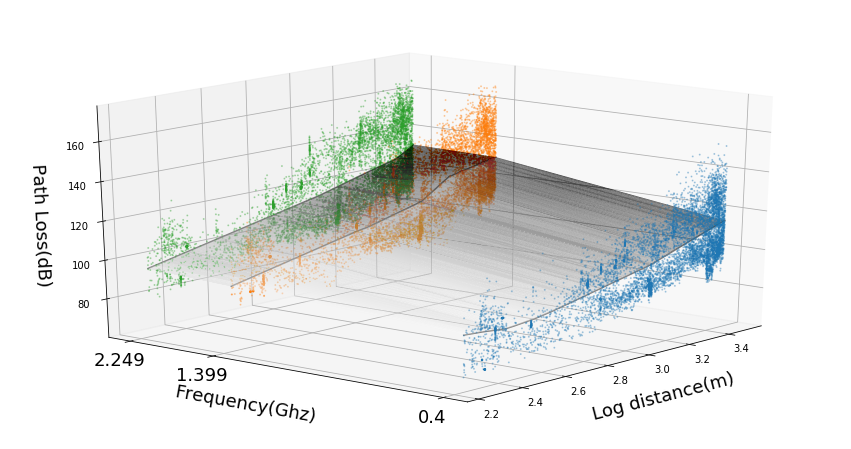

92.46147568104655
2001
7
1


TEST ERROR(dB),RMSE,MAE,MAPE,MSLE,R2
0.4Ghz,11.78770,10.10464,9.63175,0.01232,-0.78934
1.399Ghz,14.06675,12.16118,10.01396,0.01273,-0.73311
2.249Ghz,14.39627,12.56648,10.40978,0.01360,-1.41037
Overall,13.46133,11.60531,10.01674,0.01288,-0.22607


In [3]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60, 60, 60, 60, 60), 'relu', 'lbfgs')

print("<Iksan - Winter> Relu (dist<=3000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
y_pred_400 = model.predict(X_val_m_400)
y_pred_1399 = model.predict(X_val_m_1399)
y_pred_2249 = model.predict(X_val_m_2249)
y_pred = model.predict(X_val_m)
stat = np.array([mlp_prediction_error(model,X_val_m_400, y_val_m_400),mean_absolute_error(y_pred_400, y_val_m_400),mean_absolute_percentage_error(y_pred_400, y_val_m_400),mean_squared_log_error(y_pred_400, y_val_m_400),r2_score(y_pred_400, y_val_m_400),
                 mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),mean_absolute_error(y_pred_1399, y_val_m_1399),mean_absolute_percentage_error(y_pred_1399, y_val_m_1399),mean_squared_log_error(y_pred_1399, y_val_m_1399),r2_score(y_pred_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),mean_absolute_error(y_pred_2249, y_val_m_2249),mean_absolute_percentage_error(y_pred_2249, y_val_m_2249),mean_squared_log_error(y_pred_2249, y_val_m_2249),r2_score(y_pred_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_val_m, y_val_m), mean_absolute_error(y_pred, y_val_m),mean_absolute_percentage_error(y_pred, y_val_m),mean_squared_log_error(y_pred, y_val_m),r2_score(y_pred, y_val_m)])

(pd.DataFrame(stat.reshape((4,5)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','MSLE','R2'],name='TEST ERROR(dB)')))

<Iksan - Winter> Logistic Sigmoid (dist<=3000m)


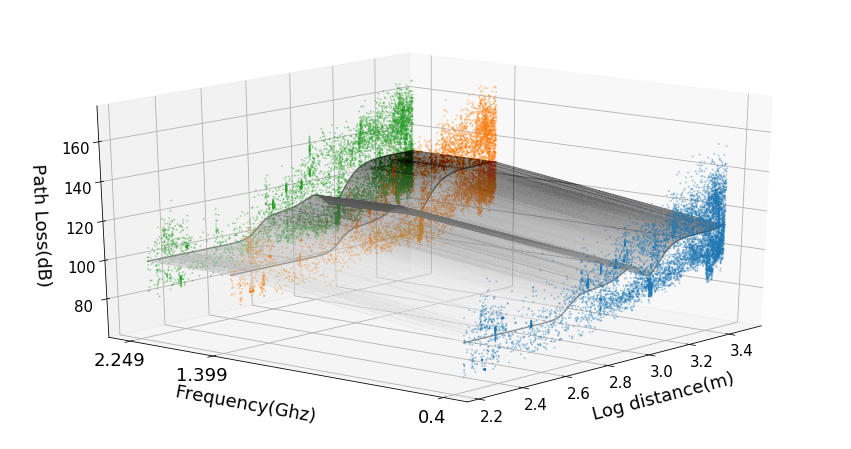

88.76180697122949
2001
3
1


TEST ERROR(dB),RMSE,MAE,MAPE,MSLE,R2
0.4Ghz,11.55853,9.75643,9.29533,0.01176,-0.54867
1.399Ghz,13.87682,11.80013,9.71122,0.01227,-0.83632
2.249Ghz,14.17802,12.31075,10.14277,0.01317,-0.83402
Overall,13.25059,11.28343,9.71453,0.01240,-0.11881


In [4]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60), 'logistic', 'lbfgs')

print("<Iksan - Winter> Logistic Sigmoid (dist<=3000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
y_pred_400 = model.predict(X_val_m_400)
y_pred_1399 = model.predict(X_val_m_1399)
y_pred_2249 = model.predict(X_val_m_2249)
y_pred = model.predict(X_val_m)
stat = np.array([mlp_prediction_error(model,X_val_m_400, y_val_m_400),mean_absolute_error(y_pred_400, y_val_m_400),mean_absolute_percentage_error(y_pred_400, y_val_m_400),mean_squared_log_error(y_pred_400, y_val_m_400),r2_score(y_pred_400, y_val_m_400),
                 mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),mean_absolute_error(y_pred_1399, y_val_m_1399),mean_absolute_percentage_error(y_pred_1399, y_val_m_1399),mean_squared_log_error(y_pred_1399, y_val_m_1399),r2_score(y_pred_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),mean_absolute_error(y_pred_2249, y_val_m_2249),mean_absolute_percentage_error(y_pred_2249, y_val_m_2249),mean_squared_log_error(y_pred_2249, y_val_m_2249),r2_score(y_pred_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_val_m, y_val_m), mean_absolute_error(y_pred, y_val_m),mean_absolute_percentage_error(y_pred, y_val_m),mean_squared_log_error(y_pred, y_val_m),r2_score(y_pred, y_val_m)])

(pd.DataFrame(stat.reshape((4,5)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','MSLE','R2'],name='TEST ERROR(dB)')))

<Iksan - Winter> Tangent Hyperbolic (dist<=3000m)


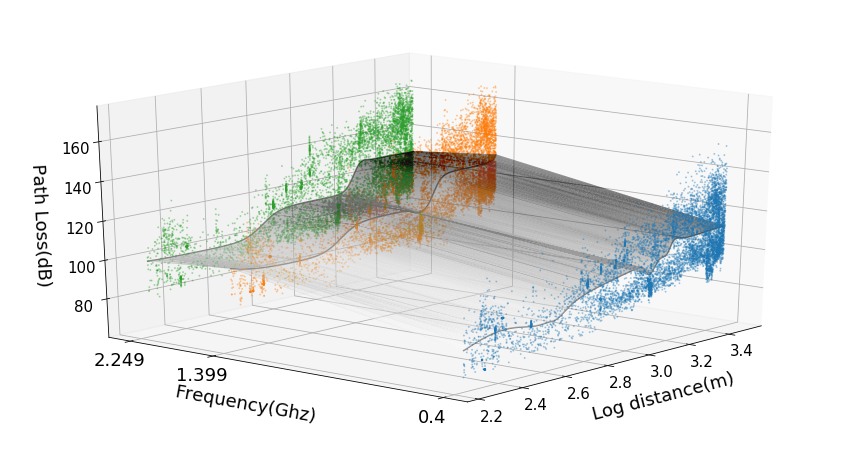

89.00578964225448
2001
3
1


TEST ERROR(dB),RMSE,MAE,MAPE,MSLE,R2
0.4Ghz,11.53099,9.73835,9.27533,0.01168,-0.53644
1.399Ghz,13.87899,11.76413,9.68450,0.01227,-0.82670
2.249Ghz,14.23821,12.39596,10.22481,0.01329,-0.88170
Overall,13.26466,11.29357,9.72606,0.01241,-0.12342


In [5]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60), 'tanh', 'lbfgs')

print("<Iksan - Winter> Tangent Hyperbolic (dist<=3000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
y_pred_400 = model.predict(X_val_m_400)
y_pred_1399 = model.predict(X_val_m_1399)
y_pred_2249 = model.predict(X_val_m_2249)
y_pred = model.predict(X_val_m)
stat = np.array([mlp_prediction_error(model,X_val_m_400, y_val_m_400),mean_absolute_error(y_pred_400, y_val_m_400),mean_absolute_percentage_error(y_pred_400, y_val_m_400),mean_squared_log_error(y_pred_400, y_val_m_400),r2_score(y_pred_400, y_val_m_400),
                 mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),mean_absolute_error(y_pred_1399, y_val_m_1399),mean_absolute_percentage_error(y_pred_1399, y_val_m_1399),mean_squared_log_error(y_pred_1399, y_val_m_1399),r2_score(y_pred_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),mean_absolute_error(y_pred_2249, y_val_m_2249),mean_absolute_percentage_error(y_pred_2249, y_val_m_2249),mean_squared_log_error(y_pred_2249, y_val_m_2249),r2_score(y_pred_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_val_m, y_val_m), mean_absolute_error(y_pred, y_val_m),mean_absolute_percentage_error(y_pred, y_val_m),mean_squared_log_error(y_pred, y_val_m),r2_score(y_pred, y_val_m)])

(pd.DataFrame(stat.reshape((4,5)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','MSLE','R2'],name='TEST ERROR(dB)')))